In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('top500mangaMAL.csv')

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Manga ID         500 non-null    int64  
 1   Manga URL        500 non-null    object 
 2   English Title    500 non-null    object 
 3   Synonims Titles  500 non-null    object 
 4   Japanese Title   500 non-null    object 
 5   Type             500 non-null    object 
 6   Volumes          500 non-null    object 
 7   Chapters         500 non-null    object 
 8   Status           500 non-null    object 
 9   Published        500 non-null    object 
 10  Published Dates  500 non-null    object 
 11  Genres           500 non-null    object 
 12  Author           500 non-null    object 
 13  Serialization    500 non-null    object 
 14  Score            500 non-null    float64
 15  Ranked           500 non-null    int64  
 16  Popularity       500 non-null    int64  
 17  Members         

In [92]:
dataset.head(10)

,Manga ID,Manga URL,English Title,Synonims Titles,Japanese Title,Type,Volumes,Chapters,Status,Published,Published Dates,Genres,Author,Serialization,Score,Ranked,Popularity,Members,Favorites,Score Voted By
0,2,https://myanimelist.net/manga/2/Berserk,Berserk,Berserk: The Prototype,ベルセルク,Manga,Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","{'from': '1989-08-25', 'to': 'Unknown'}","['Action', 'Adventure', 'Demons', 'Drama', 'Fa...","['Miura, Kentarou (Story & Art)']",Young Animal,9.33,1,4,296958,61992,139571
1,1706,https://myanimelist.net/manga/1706/JoJo_no_Kim...,Unknown,JoJo's Bizarre Adventure Part 7: Steel Ball Ru...,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Manga,24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","{'from': '2004-01-19', 'to': '2011-04-19'}","['Action', 'Adventure', 'Mystery', 'Historical...","['Araki, Hirohiko (Story & Art)']",Ultra Jump,9.21,2,50,97073,18083,54901
2,25,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,"Full Metal Alchemist, Hagane no Renkinjutsushi...",鋼の錬金術師,Manga,27,116,Finished,"Jul 12, 2001 to Sep 11, 2010","{'from': '2001-07-12', 'to': '2010-09-11'}","['Action', 'Adventure', 'Comedy', 'Drama', 'Sh...","['Arakawa, Hiromu (Story & Art)']",Shounen Gangan,9.12,3,11,197562,26386,110885
3,13,https://myanimelist.net/manga/13/One_Piece,One Piece,Unknown,ONE PIECE,Manga,Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","{'from': '1997-07-22', 'to': 'Unknown'}","['Action', 'Adventure', 'Comedy', 'Fantasy', '...","['Oda, Eiichiro (Story & Art)']",Shounen Jump (Weekly),9.08,4,2,306944,75106,185560
4,1,https://myanimelist.net/manga/1/Monster,Monster,Unknown,MONSTER,Manga,18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","{'from': '1994-12-05', 'to': '2001-12-20'}","['Mystery', 'Drama', 'Psychological', 'Seinen']","['Urasawa, Naoki (Story & Art)']",Big Comic Original,9.07,5,39,103030,10000,41412
5,656,https://myanimelist.net/manga/656/Vagabond,Vagabond,Unknown,バガボンド,Manga,37,327,On Hiatus,"Mar 23, 1999 to May 21, 2015","{'from': '1999-03-23', 'to': '2015-05-21'}","['Action', 'Adventure', 'Drama', 'Historical',...","['Inoue, Takehiko (Story & Art)', ' Yoshikawa,...",Morning,9.05,6,22,134645,14596,46282
6,4632,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,Unknown,おやすみプンプン,Manga,13,147,Finished,"Mar 15, 2007 to Nov 2, 2013","{'from': '2007-03-15', 'to': '2013-11-02'}","['Drama', 'Slice', 'Slice', 'Psychological', '...","['Asano, Inio (Story & Art)']",Big Comic Spirits,9.03,7,12,182755,25247,70638
7,16765,https://myanimelist.net/manga/16765/Kingdom,Unknown,Unknown,キングダム,Manga,Unknown,Unknown,Publishing,"Jan 26, 2006 to ?","{'from': '2006-01-26', 'to': 'Unknown'}","['Action', 'Drama', 'Historical', 'Military', ...","['Hara, Yasuhisa (Story & Art)']",Young Jump,9.01,8,78,73634,7969,28524
8,70345,https://myanimelist.net/manga/70345/Grand_Blue,Grand Blue Dreaming,Unknown,ぐらんぶる,Manga,Unknown,Unknown,Publishing,"Apr 7, 2014 to ?","{'from': '2014-04-07', 'to': 'Unknown'}","['Comedy', 'Slice', 'Slice', 'Seinen']","['Inoue, Kenji (Story)', ' Yoshioka, Kimitake ...",good! Afternoon,9.00,9,71,76527,7363,26582
9,51,https://myanimelist.net/manga/51/Slam_Dunk,Slam Dunk,Unknown,SLAM DUNK,Manga,31,276,Finished,"Sep 18, 1990 to Jun 4, 1996","{'from': '1990-09-18', 'to': '1996-06-04'}","['Comedy', 'Drama', 'School', 'Shounen', 'Spor...","['Inoue, Takehiko (Story & Art)']",Shounen Jump (Weekly),8.98,10,89,69802,8049,34574


In [97]:
import ast
    
genres = []

for ligne in dataset['Genres']:
    genres.append(ast.literal_eval(ligne))
#ast.literal_eval va contruire un tableau à partir de ma ligne qui ressemble à un tableau mais qui est un string
    
#print(genres[10])

genresCount = {}
for i in genres:
    for genre in i:
        if genre in genresCount:
            genresCount[genre] += 1
        else:
            genresCount[genre] = 1
genresCount
#dictionnaire qui compte le nombre de mangas par genre

dataGenres = pd.DataFrame.from_dict(genresCount, orient='index')
dataGenresTries = dataGenres.sort_values(by=0, ascending=False)
dataGenresTries


,0
Drama,238
Slice,186
Comedy,185
Shounen,176
Action,163
Romance,154
Sci,126
School,124
Fantasy,120
Supernatural,118


In [100]:
print(dataGenresTries.index)

Index(['Drama', 'Slice', 'Comedy', 'Shounen', 'Action', 'Romance', 'Sci',
       'School', 'Fantasy', 'Supernatural', 'Seinen', 'Adventure', 'Shoujo',
       'Mystery', 'Psychological', 'Historical', 'Horror', 'Magic', 'Super',
       'Martial', 'Sports', 'Josei', 'Gender', 'Game', 'Military', 'Vampire',
       'Demons', 'Ecchi', 'Harem', 'Space', 'Thriller', 'Mecha', 'Samurai',
       'Music', 'Police', 'Parody', 'Kids', 'Dementia', 'Cars'],
      dtype='object')


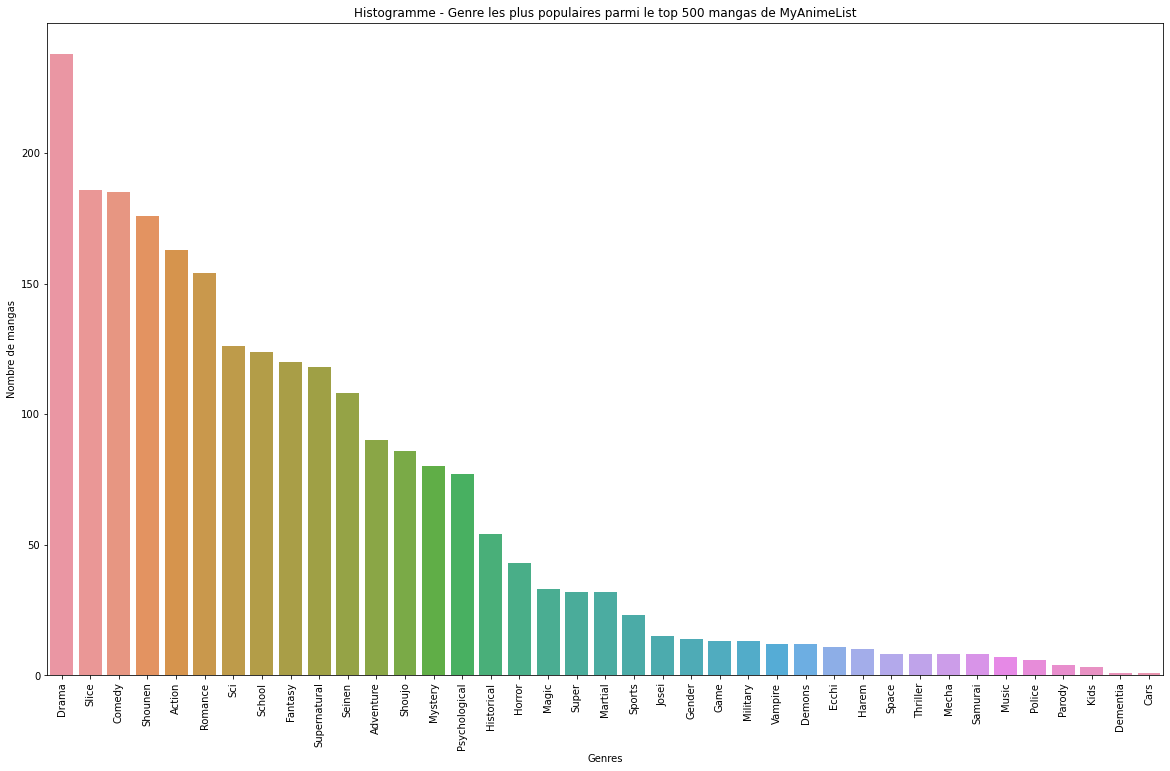

In [137]:
plt.figure(figsize=(20,12))
sns.barplot(x=dataGenresTries.index, y=dataGenresTries[0])
plt.title('Histogramme - Genre les plus populaires parmi le top 500 mangas de MyAnimeList')
plt.xlabel('Genres')
plt.xticks(rotation='vertical')
plt.ylabel('Nombre de mangas')
plt.show()